In [4]:
import pandas as pd
import numpy as np 

def load_data():
    return pd.read_csv('rivers_merged1.csv', sep = ',', header = 0)

In [5]:
data = load_data()
data = data.dropna()
convert_dict = {'YEAR': str,
                'DOY': int, 
                'WS10M_MIN': float,
                'WS10M_MAX': float,
                'WS2M_MIN': float,
                'WS2M_MAX': float,
                'PS': float,
                'T2M': float,
                'TS': float,
                'RH2M': float,
                'T2M_RANGE': float,
                'QV2M': float,
                'PRECTOTCORR': float,
                'T2MDEW': float,
                'T2MWET': float,
                'T2M_MIN': float,
                'T2M_MAX': float
                }
data = data.astype(convert_dict)
data.head()

,YEAR,DOY,WS10M_MIN,WS10M_MAX,WS2M_MIN,WS2M_MAX,PS,T2M,TS,RH2M,T2M_RANGE,QV2M,PRECTOTCORR,T2MDEW,T2MWET,T2M_MIN,T2M_MAX
0,2000,1,0.71,5.98,0.45,4.38,91.34,22.93,22.75,51.94,11.90,9.64,1.14,12.03,17.48,17.00,28.89
1,2000,2,0.43,4.66,0.19,3.45,91.27,23.31,23.73,52.62,12.09,9.89,1.36,12.36,17.83,17.59,29.68
2,2000,3,0.34,5.37,0.25,3.97,91.02,23.25,23.59,53.69,13.34,10.07,8.61,12.51,17.87,16.28,29.62
3,2000,4,0.30,4.49,0.16,3.38,91.12,23.72,24.30,56.31,11.98,10.80,3.46,13.69,18.70,17.45,29.43
4,2000,5,1.01,4.19,0.60,3.16,91.12,25.72,25.60,48.00,13.35,10.44,0.26,13.19,19.45,18.57,31.92


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8231 entries, 0 to 8230
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         8231 non-null   object 
 1   DOY          8231 non-null   int32  
 2   WS10M_MIN    8231 non-null   float64
 3   WS10M_MAX    8231 non-null   float64
 4   WS2M_MIN     8231 non-null   float64
 5   WS2M_MAX     8231 non-null   float64
 6   PS           8231 non-null   float64
 7   T2M          8231 non-null   float64
 8   TS           8231 non-null   float64
 9   RH2M         8231 non-null   float64
 10  T2M_RANGE    8231 non-null   float64
 11  QV2M         8231 non-null   float64
 12  PRECTOTCORR  8231 non-null   float64
 13  T2MDEW       8231 non-null   float64
 14  T2MWET       8231 non-null   float64
 15  T2M_MIN      8231 non-null   float64
 16  T2M_MAX      8231 non-null   float64
dtypes: float64(15), int32(1), object(1)
memory usage: 1.1+ MB


In [7]:
data.describe(include="all")

,YEAR,DOY,WS10M_MIN,WS10M_MAX,WS2M_MIN,WS2M_MAX,PS,T2M,TS,RH2M,T2M_RANGE,QV2M,PRECTOTCORR,T2MDEW,T2MWET,T2M_MIN,T2M_MAX
count,8231,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000,8231.000000
unique,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,181.119670,0.972782,6.189834,0.533899,4.452634,91.463368,18.496398,18.776409,63.471732,12.463574,9.326129,2.174027,10.130686,14.313549,12.855078,25.318606
std,NaN,105.353457,0.658367,1.631488,0.395933,1.122822,0.479056,5.827392,6.406180,16.148931,3.692589,3.879536,7.519909,6.815182,5.877614,5.596479,6.239260
min,NaN,1.000000,0.010000,1.980000,0.010000,1.550000,90.080000,-1.020000,-0.500000,14.940000,2.130000,1.890000,0.000000,-9.700000,-3.200000,-4.740000,2.950000
25%,NaN,90.000000,0.460000,5.020000,0.250000,3.660000,91.130000,14.220000,13.690000,51.810000,9.880000,5.980000,0.000000,4.830000,9.850000,8.760000,21.045000
50%,NaN,179.000000,0.870000,6.040000,0.460000,4.360000,91.440000,19.210000,19.590000,64.750000,12.350000,9.090000,0.000000,11.010000,15.080000,13.550000,25.730000
75%,NaN,272.000000,1.340000,7.200000,0.700000,5.150000,91.760000,23.010000,23.830000,76.690000,14.980000,12.450000,0.805000,15.830000,19.230000,17.320000,29.860000


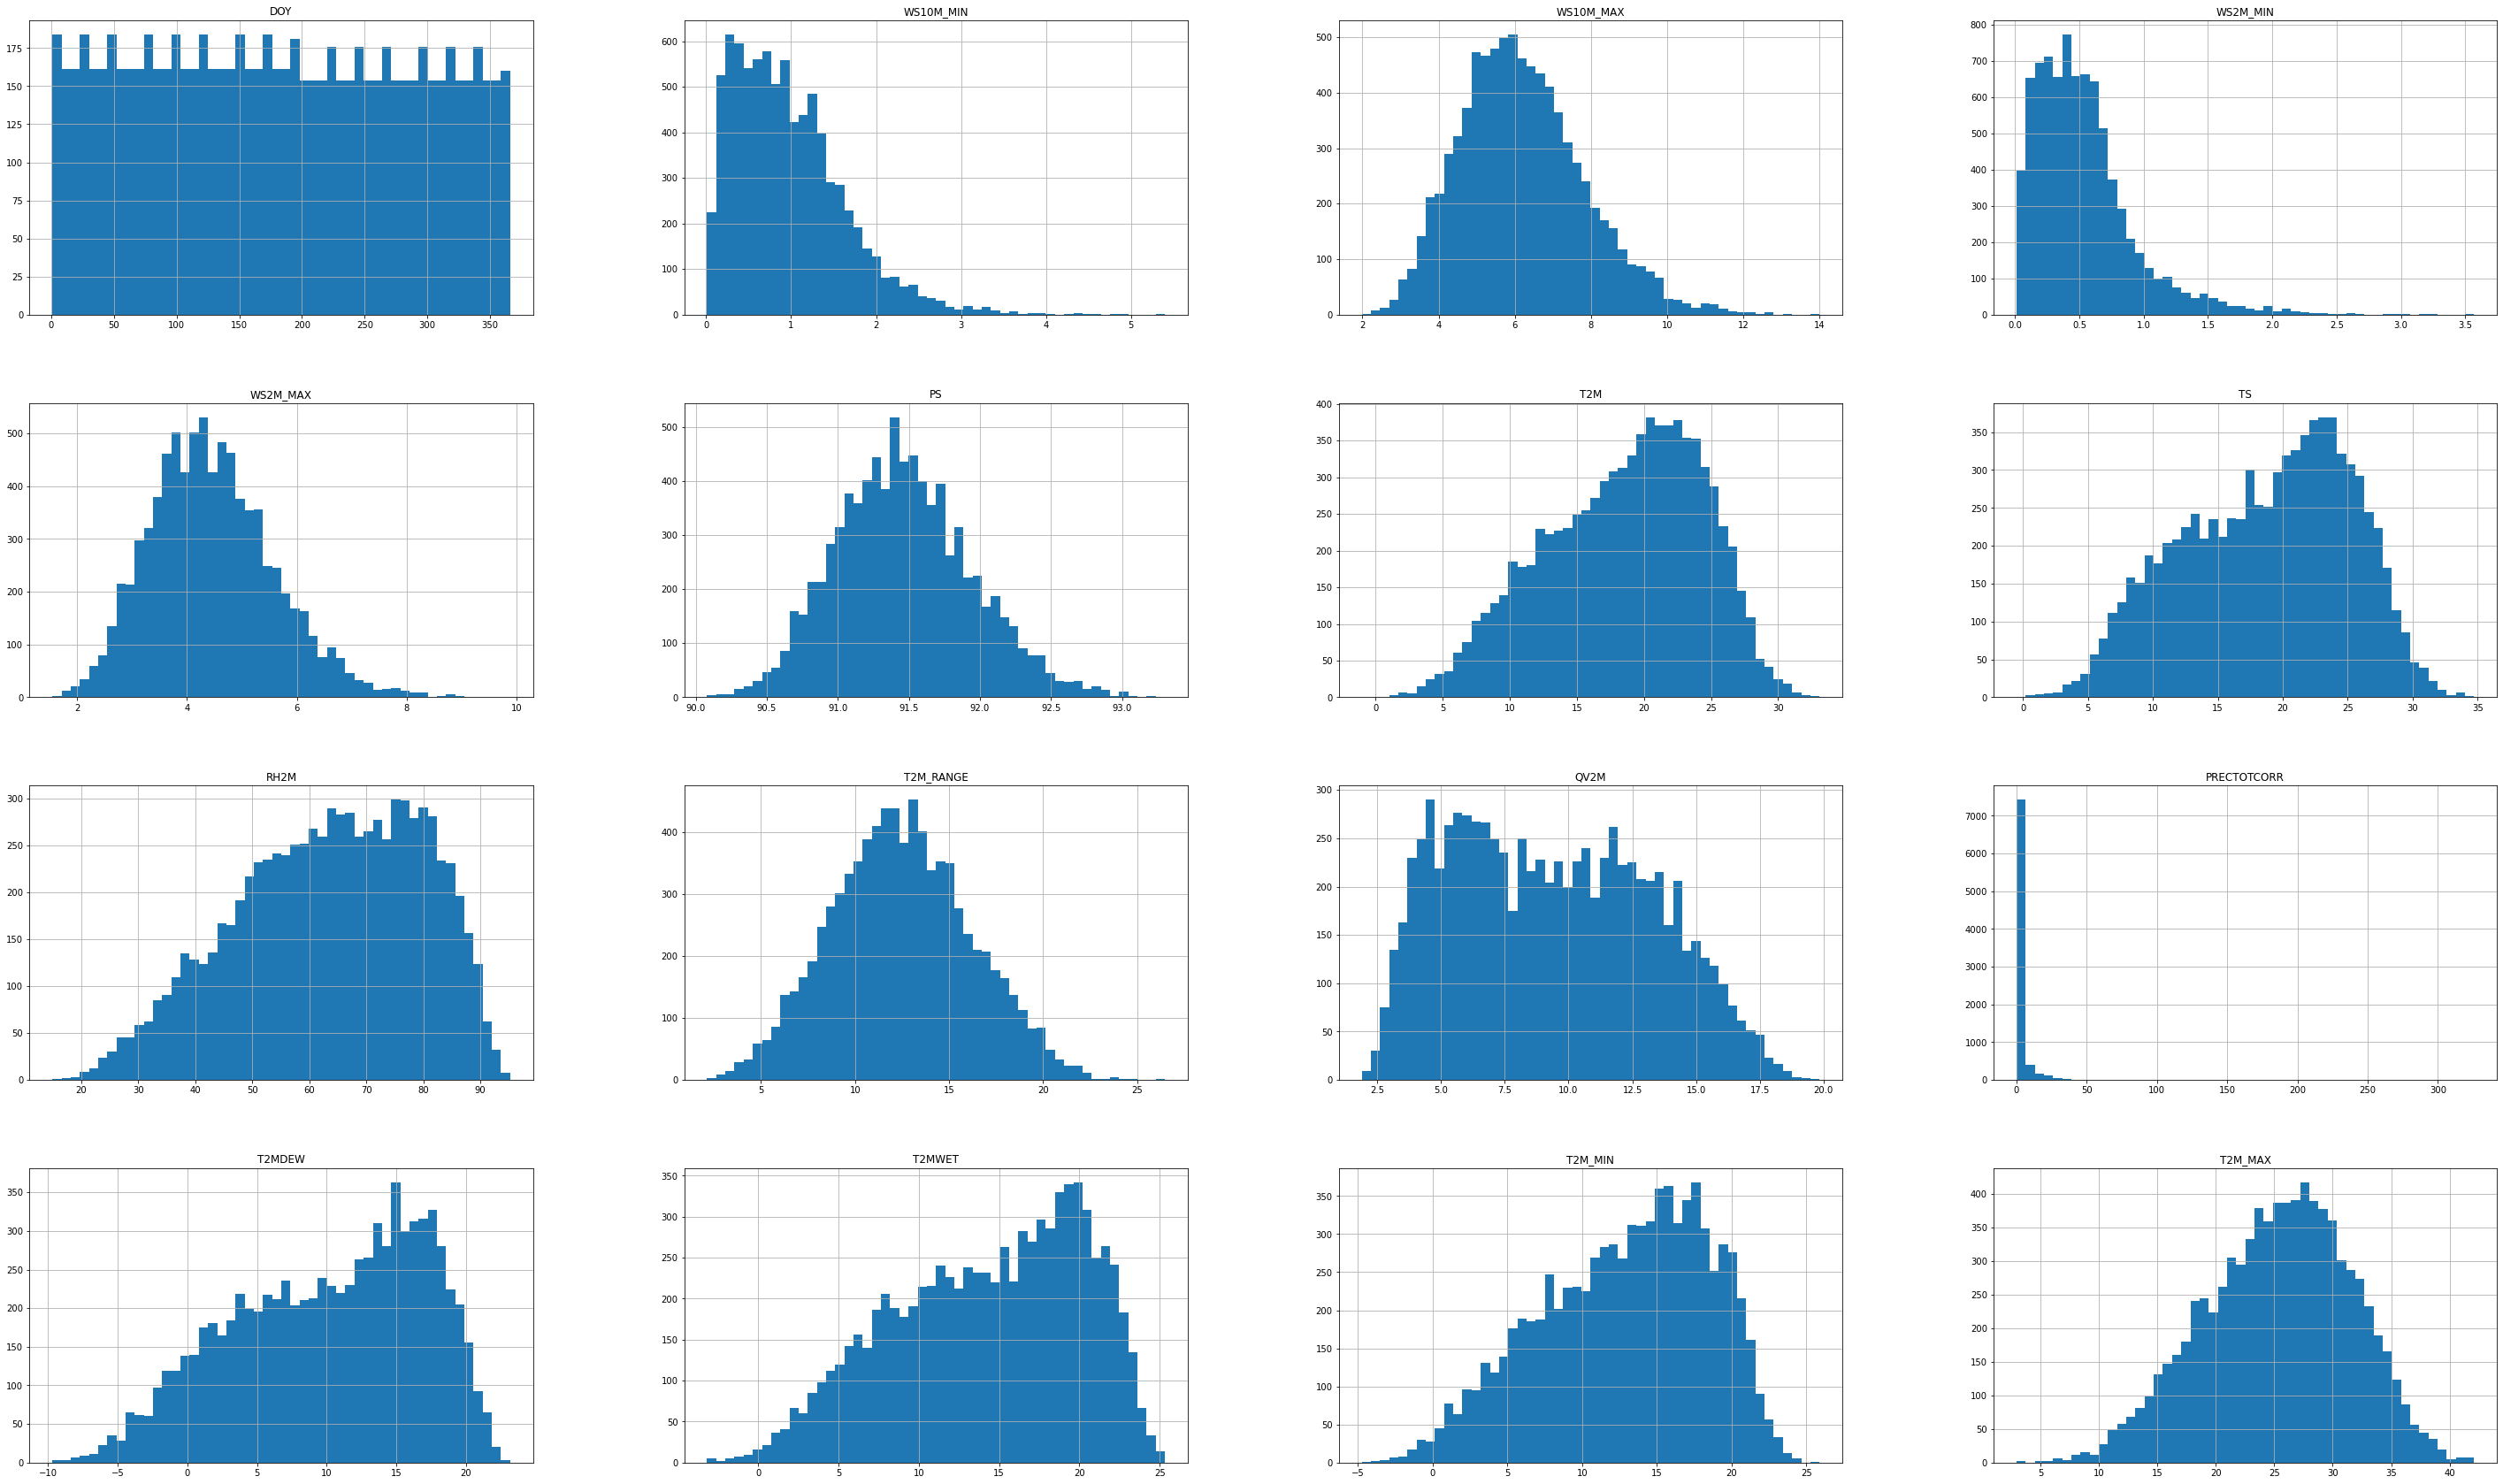

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(50,30))
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [10]:
data = data.copy()

<AxesSubplot:xlabel='PRECTOTCORR', ylabel='TS'>

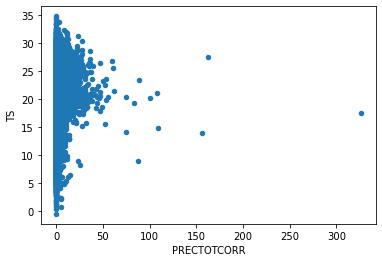

In [11]:
data.plot(kind="scatter", x="PRECTOTCORR", y="TS")

                  DOY  WS10M_MIN  WS10M_MAX  WS2M_MIN  WS2M_MAX        PS  \
DOY          1.000000   0.082771   0.278525  0.080150  0.320159 -0.007361   
WS10M_MIN    0.082771   1.000000   0.306350  0.963952  0.302168  0.111132   
WS10M_MAX    0.278525   0.306350   1.000000  0.278724  0.993900 -0.002055   
WS2M_MIN     0.080150   0.963952   0.278724  1.000000  0.274133  0.089750   
WS2M_MAX     0.320159   0.302168   0.993900  0.274133  1.000000 -0.021097   
PS          -0.007361   0.111132  -0.002055  0.089750 -0.021097  1.000000   
T2M         -0.017110   0.057541   0.302123  0.058417  0.277479  0.127639   
TS           0.013816   0.093226   0.337854  0.091601  0.318539  0.119713   
RH2M        -0.460209   0.081071  -0.217991  0.090426 -0.258312 -0.014098   
T2M_RANGE    0.402407  -0.127007   0.218301 -0.146815  0.242875  0.012432   
QV2M        -0.347578   0.083669   0.093997  0.091855  0.047857  0.030680   
PRECTOTCORR -0.084835   0.066693   0.037895  0.075436  0.018158 -0.013645   

<AxesSubplot:>

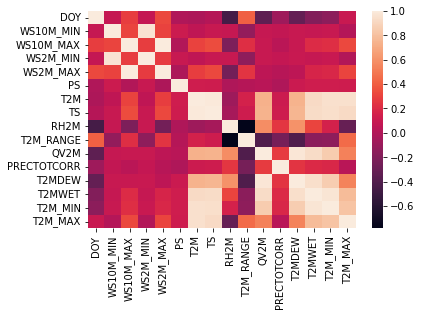

In [10]:
import seaborn as sns 
print(data.corr())
sns.heatmap(data.corr())

<AxesSubplot:xlabel='T2M', ylabel='TS'>

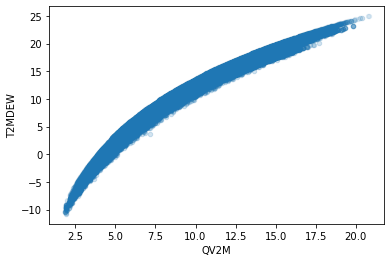

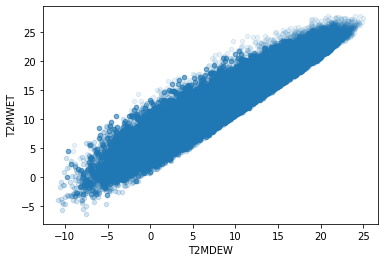

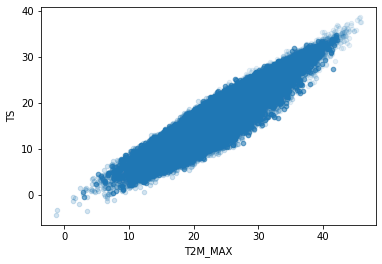

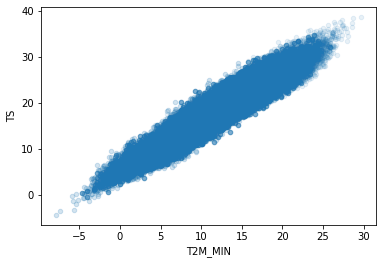

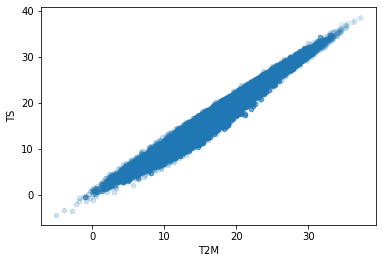

In [12]:
data.plot(kind="scatter", x="QV2M", y="T2MDEW", alpha=0.1)
data.plot(kind="scatter", x="T2MDEW", y="T2MWET", alpha=0.1)
data.plot(kind="scatter", x="T2M_MAX", y="TS", alpha=0.1)
data.plot(kind="scatter", x="T2M_MIN", y="TS", alpha=0.1)
data.plot(kind="scatter", x="T2M", y="TS", alpha=0.1)
#data.plot(kind="scatter", x="WS50M_MIN", y="WS10M_MIN", alpha=0.1)

array([[<AxesSubplot:xlabel='QV2M', ylabel='QV2M'>,
        <AxesSubplot:xlabel='T2MDEW', ylabel='QV2M'>,
        <AxesSubplot:xlabel='T2MWET', ylabel='QV2M'>,
        <AxesSubplot:xlabel='T2M_MAX', ylabel='QV2M'>,
        <AxesSubplot:xlabel='T2M_MIN', ylabel='QV2M'>,
        <AxesSubplot:xlabel='TS', ylabel='QV2M'>,
        <AxesSubplot:xlabel='T2M', ylabel='QV2M'>,
        <AxesSubplot:xlabel='WS10M_MIN', ylabel='QV2M'>,
        <AxesSubplot:xlabel='PRECTOTCORR', ylabel='QV2M'>],
       [<AxesSubplot:xlabel='QV2M', ylabel='T2MDEW'>,
        <AxesSubplot:xlabel='T2MDEW', ylabel='T2MDEW'>,
        <AxesSubplot:xlabel='T2MWET', ylabel='T2MDEW'>,
        <AxesSubplot:xlabel='T2M_MAX', ylabel='T2MDEW'>,
        <AxesSubplot:xlabel='T2M_MIN', ylabel='T2MDEW'>,
        <AxesSubplot:xlabel='TS', ylabel='T2MDEW'>,
        <AxesSubplot:xlabel='T2M', ylabel='T2MDEW'>,
        <AxesSubplot:xlabel='WS10M_MIN', ylabel='T2MDEW'>,
        <AxesSubplot:xlabel='PRECTOTCORR', ylabel='T2MDEW'>],
      

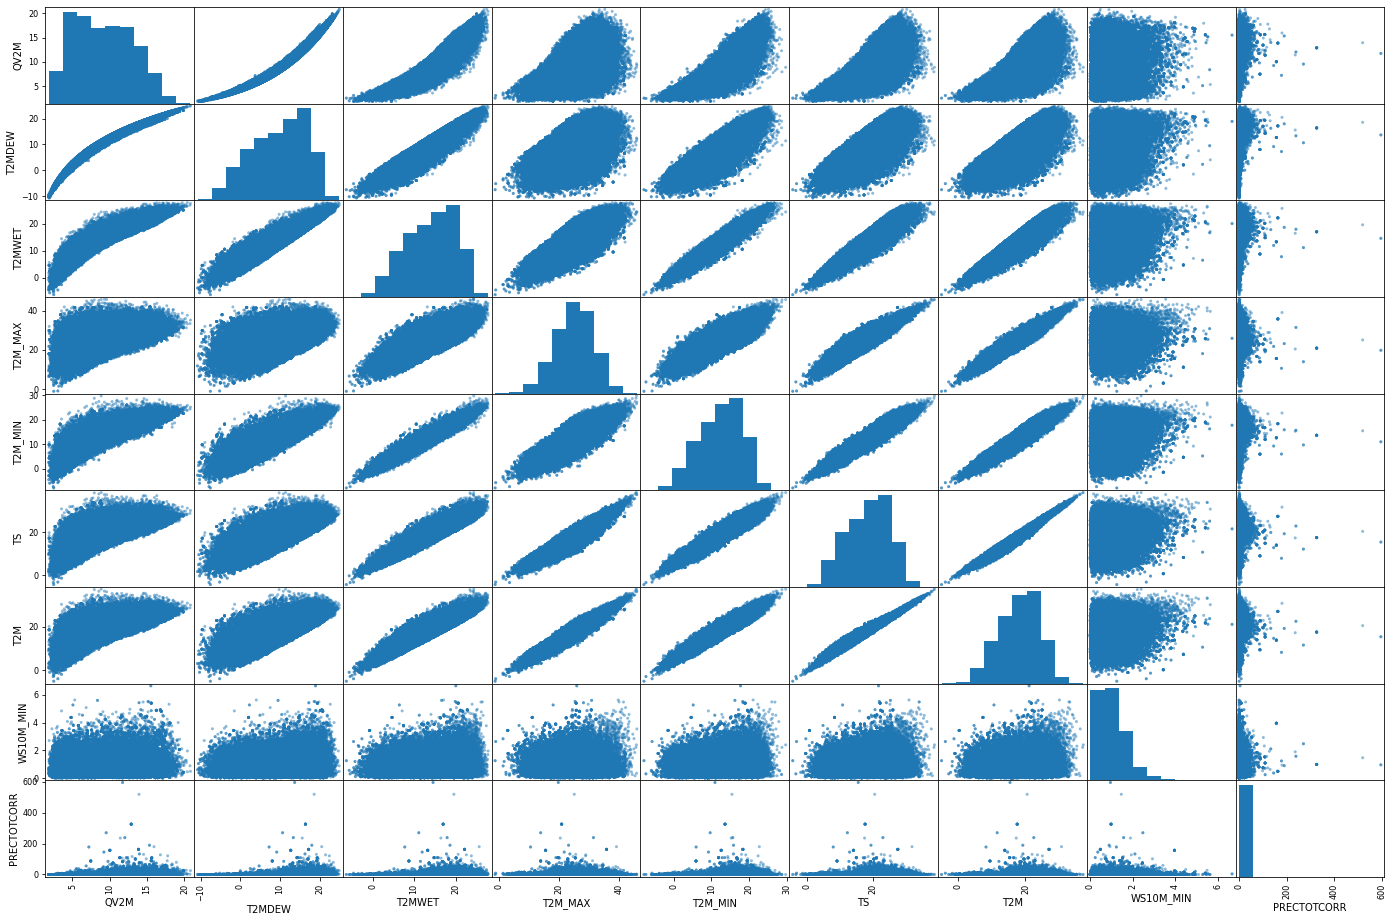

In [14]:
from pandas.plotting import scatter_matrix

attributes =['QV2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN', 'TS', 'T2M', 'WS10M_MIN','PRECTOTCORR']

scatter_matrix(data[attributes], figsize=(24,16))

In [15]:
train_set_labels = train_set["PRECTOTCORR"].copy()
data_labels = data["PRECTOTCORR"].copy()

Training and Evaluating Training Set 

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_set, train_set_labels)

In [ ]:
some_data = data.iloc[:5]
some_labels = data_labels[:5]
print("Predictions: ", lin_reg.predict(train_set))

In [ ]:
print("Labels: ", list(some_labels))

In [ ]:
from sklearn.metrics import mean_squared_error
train_predictions = lin_reg.predict(train_set)
lin_mse = mean_squared_error(data_labels, train_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse